
# DSC 478 Final Project

### Netflix Movies and TV Shows

#### YunTzu , Kun Shan


## Exploratory Data Analysis

In [1]:
#import important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import time

/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load data
netflix_df = pd.read_csv("netflix_titles.csv")

In [3]:
#check data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


We observe null values in the features: director, cast, country, and date_added based on the data information.

The only numerical variables is release_year , while the others are categoriacal variables.

In [4]:
#check data
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#summarize statistic data information
netflix_df.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


## Summary:



1. Missing Values: Columns like director, cast, country, date_added, rating, and duration have missing values.

2. Data Types: Most columns are object/string types, except for release_year, which is an integer.


3. release_year ranges from 1925 to 2021, with an average release year of approximately 2014.18.

4. The most frequent content types are Movies (6131 occurrences) and TV-MA ratings (3207 occurrences).

5. The top directors, cast members, countries, and genres/categories with the most occurrences are mentioned.


6. The dataset predominantly consists of Movies, but also includes TV Shows.

7. The content comes from various countries, with the majority from the United States.

8. There's a range of release years, suggesting a diverse collection of old and recent content.

9. Most content has missing director and cast information.

In [6]:
#need to change the features : title ,director ,cast ,country,listed_in and 
#description from data tpye of string to a data type of list.
df = netflix_df.copy()
df.country=df.country.str.split(",").tolist()
df.cast=df.cast.str.split(",").tolist()	
df.director=df.director.str.split(',').tolist() 
df.listed_in = df.listed_in.str.split(',').tolist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,[Rajiv Chilaka],[David Attenborough],[United States],"January 1, 2020",TV-MA,1 Season,"[Dramas, International Movies]","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df1 = df.copy()
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",[United States],"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [9]:
#only keep the characters in the columns : title,director,country,listed_in	,description
df1["cast"] =df1["cast"].str[0] 
df1["director"] =df1["director"].str[0] 
df1["country"] =df1["country"].str[0]
df1["listed_in"] =df1["listed_in"].str[0]

In [10]:
# Replace missing values in the 'country' variable with the mode value
df2 = df1.copy()
df2 ["country"] = df2 ["country"].fillna(df2 ['country'].mode()[0])
df2 ["country"]

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [11]:
#check rating variables
print(df2.rating.unique().tolist())

['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan, 'TV-Y7-FV', 'UR']


#### There appear to be anomalous values in the 'rating' variable such as '74 min', '84 min', '66 min', and NaN. These should not be considered as a single TV rating type.

In [12]:
df2 ["rating"]=df2 ["rating"].replace({'74 min':np.nan,'84 min':np.nan,'66 min':np.nan,'TV-Y7-FV':'TV-Y7'})
print(df2 ["rating"].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'UR']


In [13]:
#check the null value in director and cast variables.
print("Null in director: %d" % df2["director"].isnull().sum())
print("Null in cast: %d" % df2["cast"].isnull().sum())

Null in director: 2634
Null in cast: 825


In [14]:
#create new category for null value in director and cast variables.
df2 ["director"]=df2 ["director"].fillna('Unknown')
df2 ["cast"]=df2["cast"].fillna('Unknown')

Replace missing values in the 'date_added ','rating','duration' variable with the mode value

In [15]:
df2 ['date_added']=df2 ['date_added'].fillna(df2 ['date_added'].mode()[0])
df2 ['rating']=df2 ['rating'].fillna(df2 ['rating'].mode()[0])
df2 ['duration']=df2 ['duration'].fillna(df2 ['duration'].mode()[0])

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [18]:
#seperate year and month in date_added varible
df3 = df2.copy()

df3['month'] = df3['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df3['year'] = df3['date_added'].apply(lambda x : x.split(', ')[-1])

In [19]:
#drop date_added
df3=df3.drop('date_added',axis = 1)
df3.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,September,2021


In [20]:
#change month from string to numerical number

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map month names to their numerical representation and create a new 'month_numeric' column
df3['months'] = df3['month'].map(month_mapping)

# Display the DataFrame with the new 'month_numeric' column
df3.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month,year,months
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",September,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,September,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",September,2021,9
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,September,2021,9


In [21]:
df3=df3.drop('month',axis = 1)

### Summary 

The dataset has been preprocessed by transforming string columns into lists, handling anomalies in the rating column, dealing with missing values in director, cast, date_added, rating, and duration columns, and separating month and year information from date_added before dropping date_added.

### Visualization

### Summary :

1. Movies are notably more numerous than TV Shows in the Netflix dataset, suggesting that the platform predominantly offers movies.

2. This disparity might indicate Netflix's focus or the content available during the time the dataset was compiled.

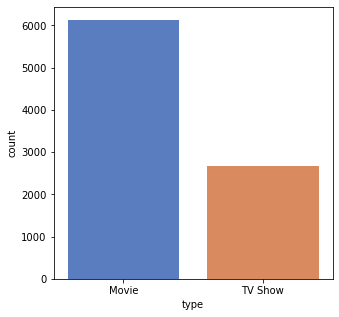

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x ='type', data = df3, palette="muted")
plt.show()

### Summary :

We notice that netflix tend to  release the majority of its show and movie in July, November and December throughout the year, this could be a contributing factor of increased viewership during the vacation season, as more people are more likely to binge-watch on Netflix on this time.

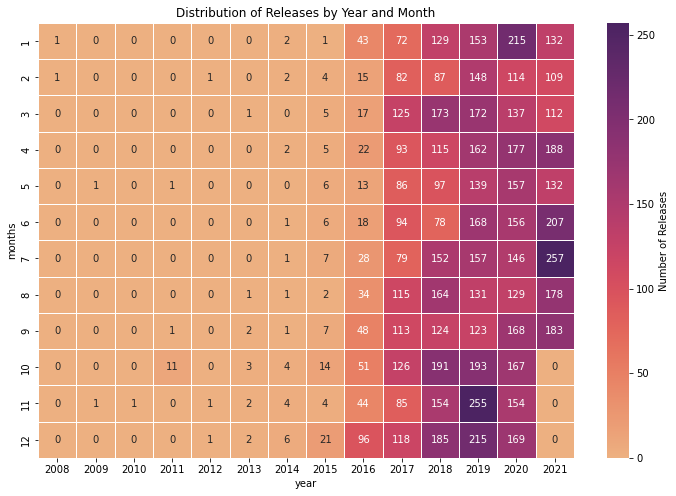

In [23]:
# Convert the heatmap data to numeric values, filling NaN with 0
heatmap_data = df3.groupby(['months','year']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="flare", annot=True, fmt="g", linewidths=.5, cbar_kws={'label': 'Number of Releases'})
plt.title('Distribution of Releases by Year and Month')
plt.show()

### Summary 

By visualizing the data, it's noteworthy that the predominant rating across both media is TV-MA indicating that the show is designed for mature audience.

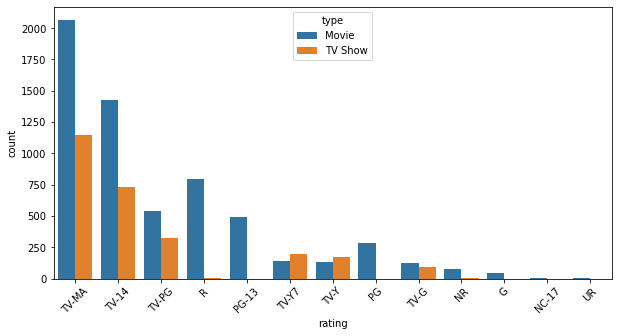

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x= 'rating',hue = "type",data = df3,order=df3['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [25]:
df3.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,months
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9


### Summary
By visualizing top ten countries contributing production in Netflix, it's evident that the US has highest production volumns followed by  India in the second position.

In [26]:
country_count = df3['country'].value_counts()
country_count[:10]

United States     4042
India             1008
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: country, dtype: int64

In [27]:
country_index = df3['country'].value_counts().index
country_index[:10]

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico', 'Australia'],
      dtype='object')

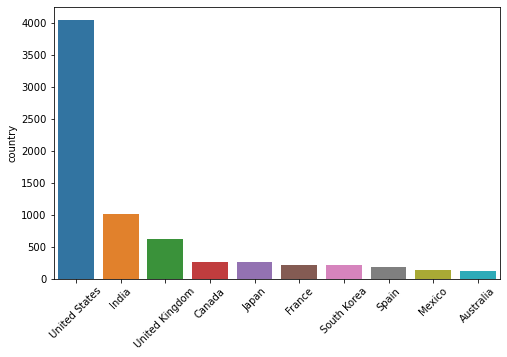

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=country_index[:10], y=country_count[:10])
plt.xticks(rotation=45)
plt.show()

In [29]:
df4 = df3.copy()

genres=df['listed_in']
gen=[]

g = {}

for i in genres:  
    for j in i:
        if j in g:
            g[j] += 1
        else:
            g[j] = 1

print(g)

{'Documentaries': 829, 'International TV Shows': 774, ' TV Dramas': 696, ' TV Mysteries': 98, 'Crime TV Shows': 399, ' International TV Shows': 577, ' TV Action & Adventure': 128, 'Docuseries': 221, ' Reality TV': 135, ' Romantic TV Shows': 338, ' TV Comedies': 461, 'TV Dramas': 67, ' TV Horror': 64, 'Children & Family Movies': 605, 'Dramas': 1600, ' Independent Movies': 736, ' International Movies': 2624, 'British TV Shows': 253, 'Comedies': 1210, ' Dramas': 827, ' Docuseries': 174, ' Comedies': 464, ' Crime TV Shows': 71, 'TV Comedies': 120, ' Spanish-Language TV Shows': 172, 'Thrillers': 65, ' Romantic Movies': 613, ' Music & Musicals': 357, 'Horror Movies': 275, ' Sci-Fi & Fantasy': 230, ' TV Thrillers': 57, "Kids' TV": 388, ' Thrillers': 512, 'Action & Adventure': 859, ' TV Sci-Fi & Fantasy': 83, ' Classic Movies': 36, ' Horror Movies': 82, ' Anime Features': 50, 'Reality TV': 120, ' Sports Movies': 218, 'Anime Series': 176, " Kids' TV": 63, 'International Movies': 128, ' Korean T

### Summary :
Genres like International Movies, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Documentaries appear to be among the most frequently occurring genres based on their larger representation in the word cloud.

In [30]:
from wordcloud import WordCloud

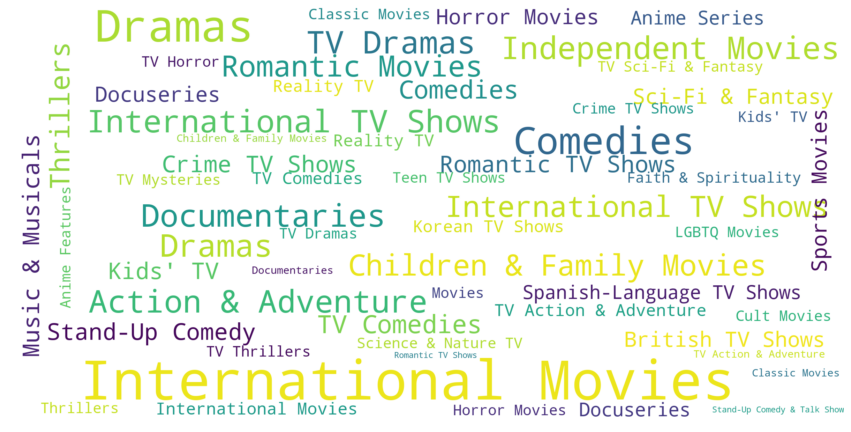

In [31]:
# Create a WordCloud object
wordcloud = WordCloud(scale=6, background_color='white').generate_from_frequencies(g)

# Display the WordCloud using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## Cosine Similarity Approach:

### Summary 

#### Introduction:
The Cosine Similarity method was employed to recommend shows on Netflix based on their textual descriptions. This method utilizes TF-IDF vectors to represent the descriptions and computes the cosine similarity between them. The goal was to suggest similar shows to a queried show based on the similarity of their descriptions.
#### Methodology and Implementation:
We utilized the Netflix dataset containing show titles and descriptions. The following Python libraries were employed: sklearn.metrics.pairwise.cosine_similarity for calculating cosine similarity and sklearn.feature_extraction.text.TfidfVectorizer for generating TF-IDF Example Results:
For instance, using the query title "My Runway," the system recommended the top ten shows based on textual description similarity.
#### Discussion:
The Cosine Similarity method effectively identified shows with descriptions akin to the queried show. By comparing the textual content using TF-IDF vectors and cosine similarity, the algorithm successfully recommended shows that exhibited similar themes or narratives. However, limitations may arise in cases where shows have subtle nuances or complex descriptions that the method might not capture accurately.

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
df5 = df4.copy()
df5.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,months
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9


In [34]:
vectorizer = TfidfVectorizer()
transform = vectorizer.fit_transform(df5['description'])
cs = cosine_similarity(transform, transform)
data = df5['title']

In [35]:
def netflix_recommendations_description(title, cs = cs):
  title_search = pd.Index(data).get_loc(title)
  sim = list(enumerate(cs[title_search]))
  sim = sorted(sim, key=lambda x: x[1], reverse = True)
  top_ten = sim[1:11]
  recom = [i[0] for i in top_ten]
  return df5[['title', 'description']].iloc[recom]

In [58]:
netflix_recommendations_description('My Runway')

,title,description
3331,Christmas in the Heartland,Two girls realize they're both visiting grandp...
8048,Social Animals,This documentary follows a trio of teens – a d...
847,Mad for Each Other,Bothered to realize they are next-door neighbo...
6932,Harry & Bunnie,A young wannabe magician and his mischievous s...
5184,Akulah Balqis,A little girl must enter an orphanage after he...
8425,The Model,Danish teen Emma moves to Paris hoping to beco...
2643,Love 101,While trying to make their teacher fall for a ...
6983,Holding the Man,"In 1970s Australia, two teen boys fall in love..."
1821,Listen,A sound engineer falls for a model but after a...
3112,Being Mrs Elliot,When a scorned wife from the city shares a cab...


# KNN Approach

### Summary


#### Introduction:
The K-Nearest Neighbors (KNN) algorithm was utilized to recommend similar shows within the Netflix dataset based on combined textual content, including titles, descriptions, and listed categories. KNN identifies the nearest neighbors to a queried show by calculating similarity in their combined textual features.

#### Methodology and Implementation:
Data Preparation:

Utilized the Netflix dataset containing show titles, descriptions, cast, and categories.
Combined relevant text columns (title, description, listed categories) to form a single text for each show.
TF-IDF Vectorization:

Employed sklearn.feature_extraction.text.TfidfVectorizer to generate TF-IDF matrices from the combined text.
Transformed the textual data into numerical representations using TF-IDF weights.
KNN Algorithm:

Implemented sklearn.neighbors.NearestNeighbors to build the KNN model.
Set the number of neighbors to 5 and used the cosine similarity metric for finding the closest matches.
Example Query and Nearest Neighbors Retrieval:

Chose a query index corresponding to a specific show in the dataset.
Obtained the combined text of the queried show.
Calculated the TF-IDF vector for the query text.
Applied the KNN model to find the five nearest neighbors based on textual similarities.
Example Results:
For instance, let's consider the query show with index 0, which corresponds to the show "Dick Johnson" in netflix dataset.
#### Conclusion:
The KNN approach effectively identifies shows with textual similarities, providing recommendations based on combined textual features. The method aids in suggesting related shows for users based on their preferences and interests.

In [37]:
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [38]:
df6 = df4.copy()
df6.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,months
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,United States,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,Unknown,Mayur More,India,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9


In [39]:
# Concatenate text columns to create a single text for each show
df6['combined_text'] = df6['title'] + ' ' + df6['description'] + ' ' + df6['listed_in']

In [40]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined text using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df6['combined_text'])

# elect relevant columns for analysis
selected_columns = ['title', 'description', 'listed_in']
netflix_subset = df6[selected_columns]

In [41]:
# Apply KNN algorithm for document retrieval
# Set up NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')
knn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [42]:
# Example query
query_index = 0  # Change this index for different queries
query_text = df6.loc[query_index, 'combined_text']

In [43]:
# Transform the query using TF-IDF
query_tfidf = tfidf_vectorizer.transform([query_text])

# Find nearest neighbors for the query
distances, indices = knn_model.kneighbors(query_tfidf)

# Display nearest neighbors
nearest_neighbors = df6.iloc[indices[0]]
print(nearest_neighbors)

     show_id   type                                    title         director  \
0         s1  Movie                     Dick Johnson Is Dead  Kirsten Johnson   
5233   s5234  Movie  The Death and Life of Marsha P. Johnson     David France   
4877   s4878  Movie                                 End Game      Rob Epstein   
3891   s3892  Movie      ReMastered: Devil at the Crossroads      Brian Oakes   
5894   s5895  Movie               Anjelah Johnson: Not Fancy        Jay Karas   

                       cast        country  release_year rating duration  \
0                   Unknown  United States          2020  PG-13   90 min   
5233                Unknown         Greece          2017  TV-MA  106 min   
4877                Unknown  United States          2018  TV-PG   40 min   
3891                Unknown  United States          2019  TV-14   49 min   
5894  Anjelah Johnson-Reyes  United States          2015  TV-14   64 min   

            listed_in                                   

# K-Means Clustering Approach

### Summary
#### Introduction:
K-Means clustering was applied to the Netflix dataset to group shows into clusters based on their textual information. This method aimed to partition shows into distinct groups by finding similarities in their combined textual features.

#### Methodology and Implementation:
Data Preparation:

Employed the Netflix dataset containing show titles, descriptions, and listed categories.
Created a combined text representation by concatenating relevant columns (title, description, listed categories) for each show.
TF-IDF Vectorization:

Utilized sklearn.feature_extraction.text.TfidfVectorizer to generate TF-IDF matrices from the combined text.
Transformed the textual data into numerical representations using TF-IDF weights.
Determining Optimal Clusters:

Used a for loop to iterate from 2 to 10 clusters.
For each cluster value, trained a K-Means model and computed silhouette scores to evaluate cluster quality.
Calculated silhouette scores using sklearn.metrics.silhouette_score for different cluster sizes.
Elbow Method Visualization:

Plotted the silhouette scores against the number of clusters to visualize the optimal cluster selection using silhouette analysis.
Generated an Elbow plot to observe the within-cluster sum of squares against the number of clusters.
Final Model and Evaluation:

Trained the K-Means model with the chosen number of clusters (e.g., 12 clusters) based on the insights gained from silhouette scores.
Predicted cluster labels for the shows and evaluated the final silhouette score for the chosen model configuration.
#### Conclusion:
K-Means clustering effectively grouped shows into clusters based on their textual content. The silhouette analysis and Elbow Method aided in determining the optimal number of clusters, enabling efficient categorization of shows into distinct groups for better organization or recommendation purposes.

In [57]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score

In [54]:
silhouette_scores = []  
within_cluster_sum_of_squares = []  
#Using for loop for iterations from 2 to 10.  

for cluster in range(2, 11):  
    kmeans = KMeans(n_clusters=cluster,random_state= 100)  
    kmeans.fit(tfidf_matrix )  
    preds = kmeans.predict(tfidf_matrix )
    score = silhouette_score(tfidf_matrix , preds)
    print("For n_clusters = %d, Silhouette score is %6f" % (cluster, score))
    silhouette_scores.append(kmeans.inertia_) 
    within_cluster_sum_of_squares.append(kmeans.inertia_)

/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, Silhouette score is 0.002357


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, Silhouette score is 0.003692


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, Silhouette score is 0.004101


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, Silhouette score is 0.005013


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, Silhouette score is 0.006101


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, Silhouette score is 0.007008


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, Silhouette score is 0.006404


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, Silhouette score is 0.007074


/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10, Silhouette score is 0.006636


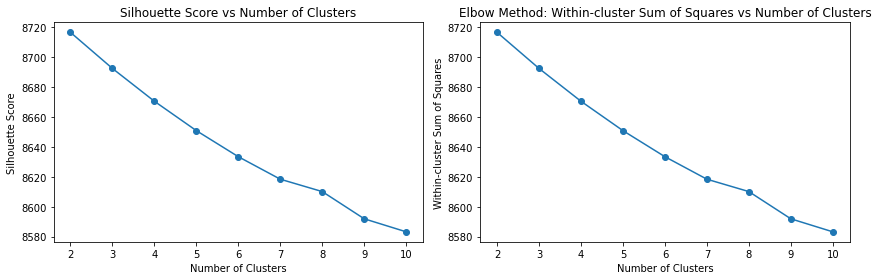

In [56]:
# Plotting the Elbow Method
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plotting Silhouette scores
ax[0].plot(range(2, 11), silhouette_scores, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].set_title('Silhouette Score vs Number of Clusters')

# Plotting Within-cluster sum of squares (Elbow plot)
ax[1].plot(range(2, 11), within_cluster_sum_of_squares, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Within-cluster Sum of Squares')
ax[1].set_title('Elbow Method: Within-cluster Sum of Squares vs Number of Clusters')

plt.tight_layout()
plt.show()

In [47]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 12, init='k-means++', random_state= 100)  
y_predict= kmeans.fit_predict(tfidf_matrix) 

/Users/yuntzuyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(tfidf_matrix, y_predict)
print("Silhouette score is %6f" % (score))

Silhouette score is 0.006838
